<b>Методы одномерного поиска.</b>

<i>Дана функция: f(x) = cos(x)</i>

<b>Аналитическое решение</b>

При минимальном значении (x = 0), cos(0) = 1

<b>Импорт библиотек, задание списков, чтобы в будущем на их основе создать таблицу. Создание функции для добавления данных в списки. Запрос ввода точности.</b>

In [21]:
import numpy as np
import time
import pandas as pd
import math
import matplotlib.pyplot as plt

tolerance = float(input("Введите точность: "))

def f(x):
    return np.cos(x)

def derivative(x):
    return np.cos(x)

minf_list = []
minx_list = []
iter_list = []
exec_list = []
final_interval_list=[]

def add_values(minf, minx, iters, exec_time):
    minf_list.append(minf)
    minx_list.append(minx)
    iter_list.append(iters)
    exec_list.append(exec_time)

<b>Метод половинного деления</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		50.000000	100.000000	50.000000		N/A
2		75.000000	100.000000	25.000000		0.5
3		87.500000	100.000000	12.500000		0.5
4		93.750000	100.000000	6.250000		0.5
5		96.875000	100.000000	3.125000		0.5
6		96.875000	98.437500	1.562500		0.5
7		97.656250	98.437500	0.781250		0.5
8		97.656250	98.046875	0.390625		0.5
9		97.656250	97.851562	0.195312		0.5
10		97.656250	97.753906	0.097656		0.5
11		97.656250	97.705078	0.048828		0.5
12		97.656250	97.680664	0.024414		0.5
13		97.656250	97.668457	0.012207		0.5
14		97.656250	97.662354	0.006104		0.5
15		97.656250	97.659302	0.003052		0.5
16		97.656250	97.657776	0.001526		0.5
17		97.656250	97.657013	0.000763		0.5
18		97.656250	97.656631	0.000381		0.5
19		97.656250	97.656441	0.000191		0.5
20		97.656250	97.656345	0.000095		0.5
Минимальное значение функции: -0.964599002586723,
 Значение x: 97.65625,
 Число итераций: 20,
 Время выполнения: 0.000000 секунд.


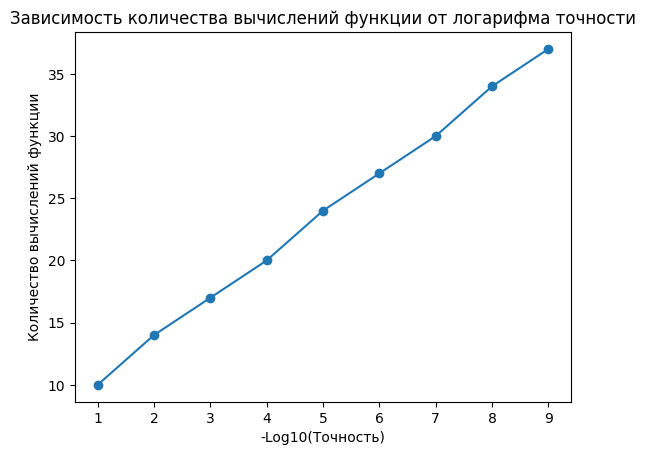

In [22]:
def half_interval(start, end, tol):
    iters = 0
    data = [] 
    prev_interval_length = float('inf')  
    while end - start > tol:
        iters += 1
        mid = (start + end) / 2
        if f(mid) > f(start):
            end = mid
        else:
            start = mid

        final_interval = end - start
        ratio = final_interval / prev_interval_length if iters > 1 else None
        
        data.append([iters, start, end, final_interval, ratio])
    
        prev_interval_length = final_interval

    return start, f(start), iters, data

start_time = time.time()
result = half_interval(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    minx, minf, iters, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")
    add_values(minf, minx, iters, exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

<b>Метод золотого сечения</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
20		38.200000	100.000000	61.800000		N/A
20		38.200000	76.392400	38.192400		0.38187702265372186
20		38.200000	61.802903	23.602903		0.3818770226537214
20		38.200000	52.786594	14.586594		0.38187702265372153
20		43.772079	52.786594	9.014515		2.618644067796608
20		43.772079	49.343049	5.570970		0.38187702265372137
20		45.900190	49.343049	3.442860		2.618644067796606
20		45.900190	48.027877	2.127687		0.38187702265372225
20		46.712966	48.027877	1.314911		2.618644067796611
20		46.712966	47.525581	0.812615		0.3818770226537262
20		47.023385	47.525581	0.502196		2.618644067796672
20		47.023385	47.333742	0.310357		0.38187702265373563
20		47.023385	47.215186	0.191801		0.38187702265373247
20		47.096653	47.215186	0.118533		2.6186440677964304
20		47.096653	47.169906	0.073253		0.3818770226536931
20		47.096653	47.141923	0.045271		0.38187702265382023
20		47.113946	47.141923	0.027977		2.618644067797174
20		47.113946	47.131236	0.017290		

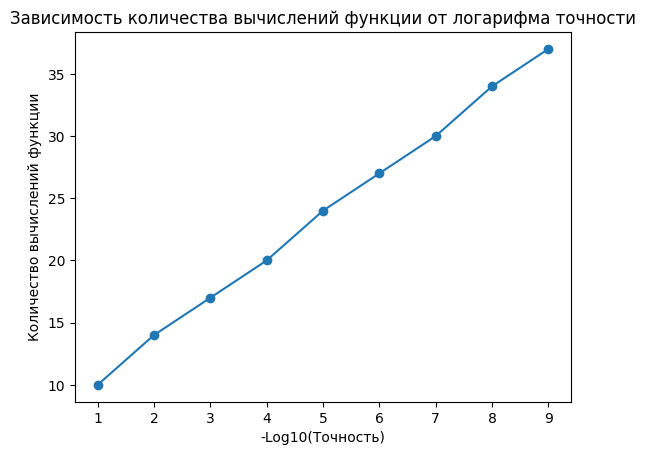

In [23]:
def golden_section(start, end, tol):
    iterations = 0
    data = []
    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618
        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2
            
        final_interval = end - start
        ratio = (end - mid1) / (mid2 - start) if iterations > 1 else None
        
        data.append([iters, start, end, final_interval, ratio])
    
        prev_interval_length = final_interval

    return start, f(start), iters, data

start_time = time.time()
result = golden_section(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    minx, minf, iters, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")
    add_values(minf, minx, iters, exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")



<b>Метод Фибоначчи</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
20		38.200000	100.000000	61.800000		N/A
20		38.200000	76.392400	38.192400		0.38187702265372186
20		38.200000	61.802903	23.602903		0.3818770226537214
20		38.200000	52.786594	14.586594		0.38187702265372153
20		43.772079	52.786594	9.014515		2.618644067796608
20		43.772079	49.343049	5.570970		0.38187702265372137
20		45.900190	49.343049	3.442860		2.618644067796606
20		45.900190	48.027877	2.127687		0.38187702265372225
20		46.712966	48.027877	1.314911		2.618644067796611
20		46.712966	47.525581	0.812615		0.3818770226537262
20		47.023385	47.525581	0.502196		2.618644067796672
20		47.023385	47.333742	0.310357		0.38187702265373563
20		47.023385	47.215186	0.191801		0.38187702265373247
20		47.096653	47.215186	0.118533		2.6186440677964304
20		47.096653	47.169906	0.073253		0.3818770226536931
20		47.096653	47.141923	0.045271		0.38187702265382023
20		47.113946	47.141923	0.027977		2.618644067797174
20		47.113946	47.131236	0.017290		

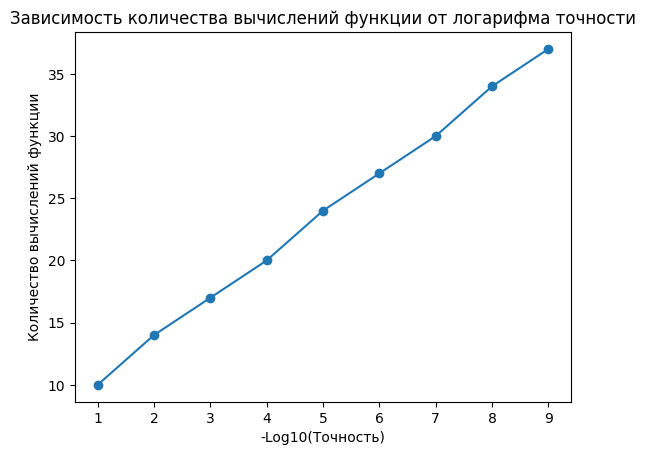

In [24]:
def fibonacci(a, b, tol):
    fib_sequence = [1, 1]
    data = []
    while fib_sequence[-1] < (b - a) / tol:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    rho = 0.5 * (1.0 + math.sqrt(5.0))
    c = b - (b - a) / rho
    d = a + (b - a) / rho
    fc = f(c)
    fd = f(d)
    iterations = 0

    while abs(c - d) > tol:
        iterations += 1
        if fc < fd:
            b = d
            d = c
            c = b - (b - a) / rho
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            d = a + (b - a) / rho
            fc = fd
            fd = f(d)

        minx = 0.5 * (a + b)
        miny = f(minx)
        interval_length = b - a
        ratio = interval_length / (b - c) if iterations > 1 else None

        data.append([iterations, a, b, interval_length, ratio])

    return minx, miny, iterations, data

start_time = time.time()
minf, minx, final_interval, iters = fibonacci(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    minx, minf, iters, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")
    add_values(minf, minx, iters, exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

<b>Метод Ньютона</b>

In [25]:

def newton(initial_guess, tolerance, interval):
    x = initial_guess
    iteration = 0
    start_time = time.time()
    data = []

    while abs(f(x)) > tolerance and interval[0] <= x <= interval[1]:
        x = x - f(x) / derivative(x)
        iteration += 1

    end_time = time.time()

    while abs(derivative(x)) > tolerance and interval[0] <= x <= interval[1]:
        f_x = f(x)
        data.append([iteration, x, f_x, interval[0], interval[1]])

        x = x - f_x / derivative(x)
        iteration += 1

    end_time = time.time()
    exec_time = end_time - start_time

    if x < interval[0]:
        x = interval[0]
    elif x > interval[1]:
        x = interval[1]

    final_interval_length = interval[1] - interval[0]

    return x, f(x), final_interval_length, iteration, exec_time, data

minx, minf, _, iters, exec_time = newton(50, tolerance, (0, 100))

interval = (0, 100)
final_interval = (interval[1] - interval[0]) / 2**iters

if isinstance(result, tuple):
    minx, minf, iters, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")
    add_values(minf, minx, iters, exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

ValueError: too many values to unpack (expected 5)

In [ ]:
df = pd.DataFrame({'Метод': ['Метод половинного деления', 'Метод золотого сечения', 'Метод Фибоначчи', 'Метод Ньютона'], 'Минимальное значение f(x)': minf_list, 'min(x)': minx_list, 'Число итераций': iter_list, 'Время выполнения': exec_list, 'Длина конечного отрезка': final_interval_list})
df.to_excel('Методы.xlsx', index=False)
df

,Метод,Минимальное значение f(x),min(x),Число итераций,Время выполнения,Длина конечного отрезка
0,Метод половинного деления,-0.964599,97.656250,17,0.000000,7.629395e-04
1,Метод золотого сечения,-1.000000,47.123669,24,0.000000,9.999997e-01
2,Метод Фибоначчи,-1.000000,47.123457,21,0.001001,4.085635e-03
3,Метод Ньютона,1.000000,0.000000,51,0.000000,4.440892e-14
